In [97]:
import pandas as pd
hr = pd.read_csv('HR.csv')
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)
print("\nSample data:")
hr.head(6)

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


In [98]:
hr=hr.rename(columns = {'sales':'department'})

In [99]:
hr.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [100]:
hr.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
dtype: bool

In [101]:
hr.shape

(14999, 10)

In [102]:
hr['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [103]:
#Let us combine “technical”, “support” and “IT” these three together and call them “technical”.
import numpy as np
hr['department']=np.where(hr['department'] =='support', 'technical', hr['department'])
hr['department']=np.where(hr['department'] =='IT', 'technical', hr['department'])

In [104]:
print(hr['department'].unique())

['sales' 'accounting' 'hr' 'technical' 'management' 'product_mng'
 'marketing' 'RandD']


In [105]:
#Data Exploration
#find out the number of employees who left the company and those who didn’t:
hr['left'].value_counts()
#There are 3571 employees left and 11428 employees stayed in our data.

0    11428
1     3571
Name: left, dtype: int64

In [106]:
hr.groupby('left').mean()
#* The average satisfaction level of employees who stayed with the company is higher than that of the employees who left.
# The average monthly work hours of employees who left the company is more than that of the employees who stayed.
# The employees who had workplace accidents are less likely to leave than that of the employee who did not have
  #workplace accidents.
# The employees who were promoted in the last five years are less likely to leave than those who did not get a promotion 
   #in the last five years.

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [107]:
hr.groupby('department').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
department,,,,,,,,
RandD,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307
accounting,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253
hr,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298
management,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524
marketing,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117
product_mng,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000
sales,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155
technical,0.613687,0.720976,3.839054,201.813795,3.416127,0.144106,0.246924,0.008258


In [108]:
hr.groupby('salary').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,0.637470,0.704325,3.767179,199.867421,3.692805,0.155214,0.066289,0.058205
low,0.600753,0.717017,3.799891,200.996583,3.438218,0.142154,0.296884,0.009021
medium,0.621817,0.717322,3.813528,201.338349,3.529010,0.145361,0.204313,0.028079


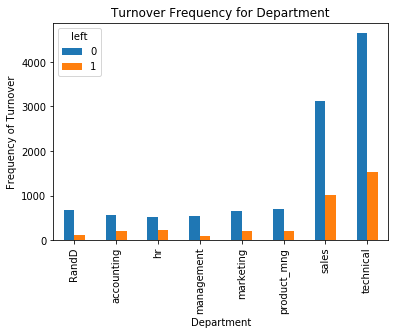

In [109]:
# visualize our data to get a much clearer picture 
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(hr.department,hr.left).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

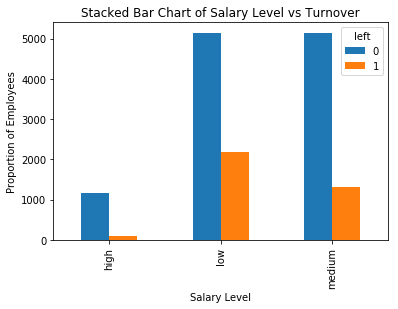

In [110]:
table=pd.crosstab(hr.salary, hr.left).plot(kind='bar')
#table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

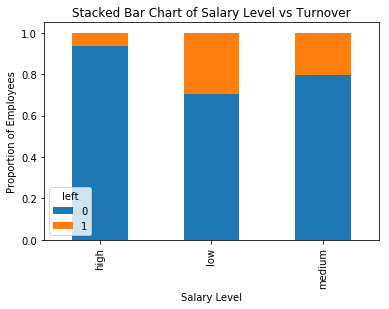

In [111]:
table=pd.crosstab(hr.salary, hr.left)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')
#The proportion of the employee turnover depends a great deal 
   #on their salary level; hence, salary level can be a good predictor in predicting the outcome.

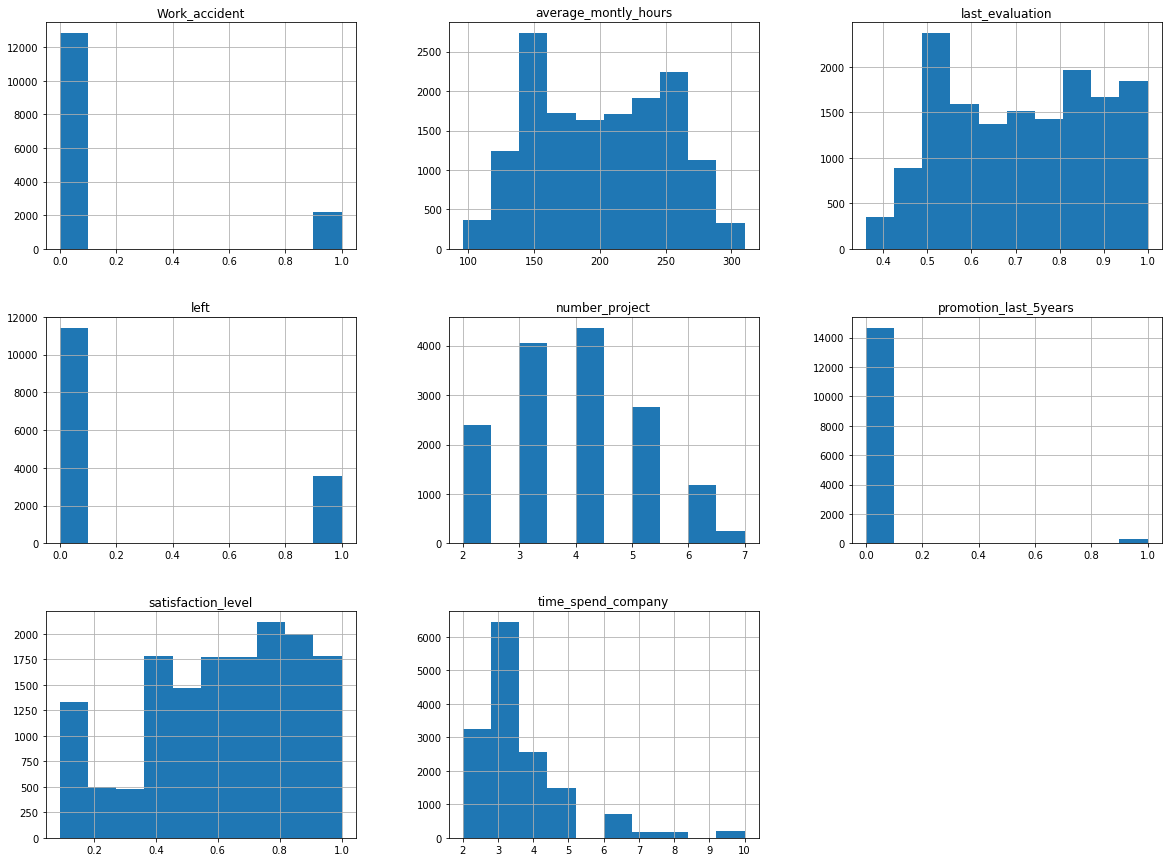

In [112]:
#Histogram of numeric variables

num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

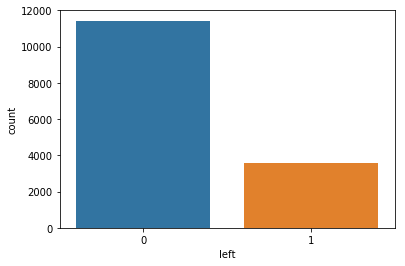

In [113]:
#How many workers left their job?
sns.countplot(hr.left)

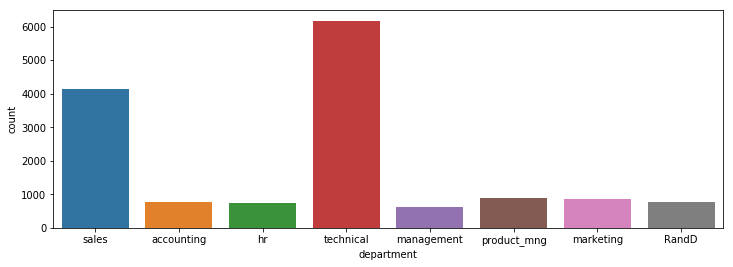

In [119]:
#Number of employees by occupation¶
plt.figure(figsize=(12,4))
sns.countplot(x='department', data=hr)
plt.show()

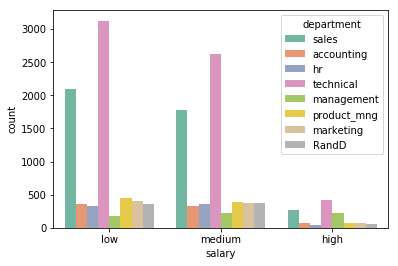

In [122]:
sns.countplot(x='salary', hue='department', data=hr, palette='Set2')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


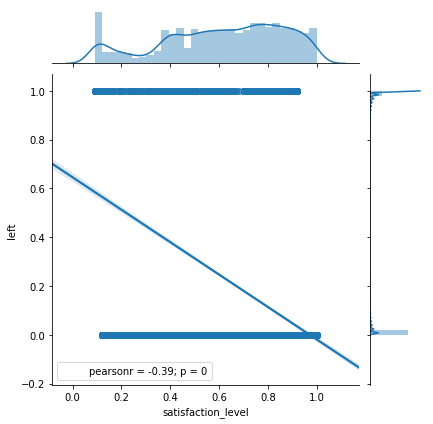

In [126]:
#Plot satisfaction_level with left
sns.jointplot(x='satisfaction_level', y='left', data=hr, kind='reg')


In [127]:
#Creating Dummy Variables for Categorical Variables
cat_vars=['department','salary']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [137]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [129]:
#You can use factorize to get the same result:
#hr['department'] = pd.factorize(hr['department'])[0]
#hr['salary'] = pd.factorize(hr['salary'])[0]

### OR ##
#for i, salary in enumerate(data.salary):
#     if salary=='low':
#        data.salary[i]=1

#     elif salary=='medium':
#        data.salary[i]=2
#            
#     elif salary == 'high':
#        data.salary[i] = 3
#    
#sales = sorted(data['sales'].unique())
#gen_mapp = dict(zip(sales, range(0, len(sales) + 1)))
#data['sales']  = data['sales'].map(gen_mapp).astype(int) 

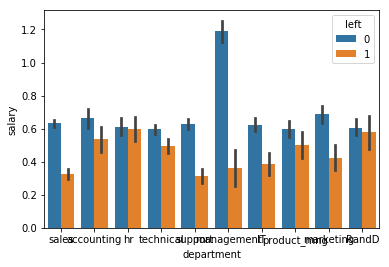

In [145]:
df = pd.read_csv('HR.csv')
df=df.rename(columns = {'sales':'department'})
#conversion of salary to numeric¶
df.salary = df.salary.astype('category').cat.reorder_categories(['low', 'medium', 'high'])
salary_numeric = pd.DataFrame(df.salary.cat.codes)
salary_numeric.columns = ['salary']
df = df.drop(['salary'], 1).join(salary_numeric)
#Comparison of salary of those who left vs those who stayed.¶
sns.barplot(x='department', y='salary', hue='left', data=df)

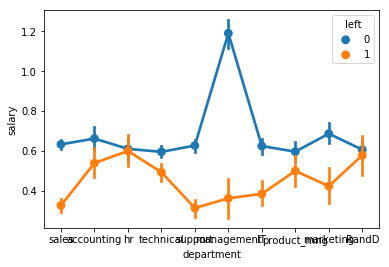

In [147]:
sns.pointplot(x='department', y='salary', hue='left', data=df)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


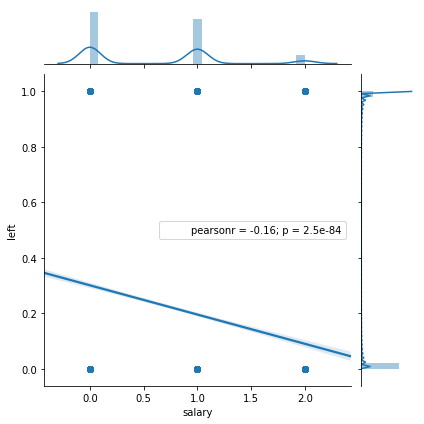

In [148]:
#People who left, on average, used to earn less. What does the correlation look like?
sns.jointplot(x='salary', y='left', data=df, kind='reg')

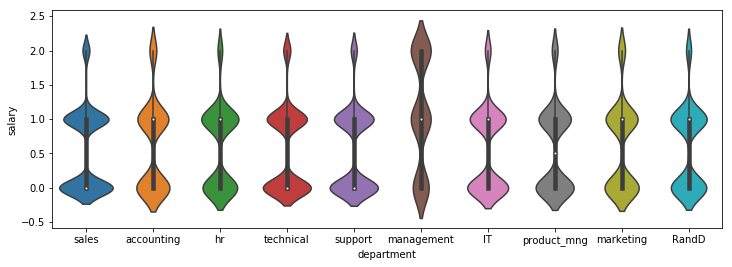

In [151]:
#Salary distibution¶
plt.figure(figsize=(12,4))
sns.violinplot(x='department', y='salary', data=df, inner='box')


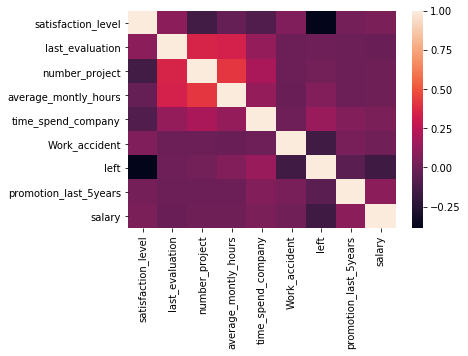

In [152]:
#Correlation¶
sns.heatmap(df.corr())

In [130]:
#The actual categorical variable needs to be removed once the dummy variables have been created.
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

In [131]:
#The outcome variable is “left”, and all the other variables are predictors.
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]
for idx, val in enumerate(X):
    print(idx, val)

0 satisfaction_level
1 last_evaluation
2 number_project
3 average_montly_hours
4 time_spend_company
5 Work_accident
6 promotion_last_5years
7 department_RandD
8 department_accounting
9 department_hr
10 department_management
11 department_marketing
12 department_product_mng
13 department_sales
14 department_technical
15 salary_high
16 salary_low
17 salary_medium


In [132]:
#The Recursive Feature Elimination (RFE) works by recursively removing variables and building a model on those variables 
    #that remain. It uses the model accuracy to identify which variables (and combination of variables) 
     #contribute the most to predicting the target attribute.
#Logistic Regression to predict
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

rfe = RFE(model, 10)
rfe = rfe.fit(hr[X], hr[y])
print(rfe.support_)
print(rfe.ranking_)

#can see that RFE chose the 10 variables for us, which are marked True in the support_ array and 
   #marked with a choice “1” in the ranking_array. They are:
    #[‘satisfaction_level’, ‘last_evaluation’, ‘time_spend_company’, ‘Work_accident’,
      #‘promotion_last_5years’, ‘department_RandD’, ‘department_hr’, ‘department_management’,
        #‘salary_high’, ‘salary_low’]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[ True  True False False  True  True  True  True False  True  True False
 False False False  True  True False]
[1 1 3 9 1 1 1 1 5 1 1 6 8 7 4 1 1 2]


In [133]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
X=hr[cols]
y=hr['left']

In [134]:
X.shape

(14999, 10)

In [135]:
y.shape

(14999,)

In [69]:
#Logistic Regression
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [70]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(y_test, logreg.predict(X_test))))

Logistic regression accuracy: 0.771


In [71]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [73]:
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(y_test, rf.predict(X_test))))

Random Forest Accuracy: 0.977


In [74]:
#Support Vector Machine
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
print('Support vector machine accuracy: {:.3f}'.format(accuracy_score(y_test, svc.predict(X_test))))

Support vector machine accuracy: 0.909


In [76]:
#Cross Validation
#Cross validation attempts to avoid overfitting while still  producing a prediction for each observation dataset. 
  #We are using 10-fold Cross-Validation to train our Random Forest model.
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = RandomForestClassifier()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.978


In [77]:
#Precision and recall
#We construct confusion matrix to visualize predictions made by a classifier and evaluate the accuracy of a classification.
####Random Forest
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99      3462
          1       0.94      0.96      0.95      1038

avg / total       0.98      0.98      0.98      4500



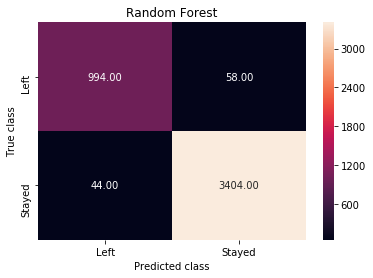

In [78]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.savefig('random_forest')

In [79]:
##Logistic Regression
print(classification_report(y_test, logreg.predict(X_test)))

             precision    recall  f1-score   support

          0       0.81      0.92      0.86      3462
          1       0.51      0.26      0.35      1038

avg / total       0.74      0.77      0.74      4500



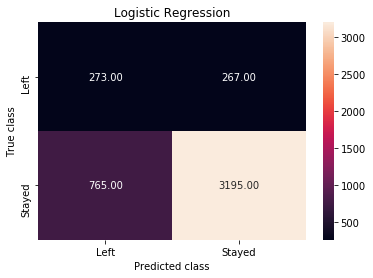

In [80]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test, [1,0])
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.savefig('logistic_regression')

In [81]:
###Support Vector Machine
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.96      0.92      0.94      3462
          1       0.77      0.86      0.81      1038

avg / total       0.91      0.91      0.91      4500



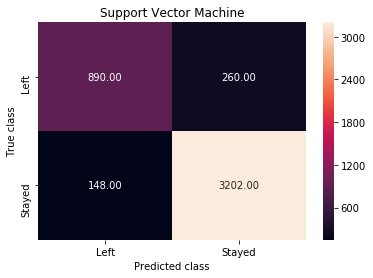

In [82]:
svc_y_pred = svc.predict(X_test)
svc_cm = metrics.confusion_matrix(svc_y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Support Vector Machine')
plt.savefig('support_vector_machine')

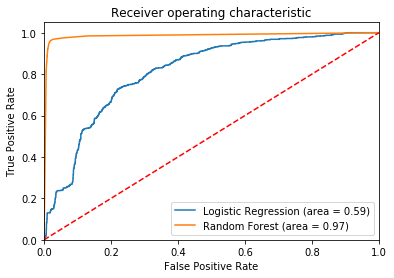

In [83]:
#The ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])

rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

#The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.
#The dotted line represents the ROC curve of a purely random classifier;
# a good classifier stays as far away from that line as possible (toward the top-left corner).

In [84]:
#Feature Importance for Random Forest Model
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years-0.14%
department_hr-0.27%
department_management-0.30%
department_RandD-0.33%
salary_high-0.62%
salary_low-1.15%
Work_accident-1.48%
last_evaluation-18.39%
time_spend_company-27.32%
satisfaction_level-50.01%


In [153]:
#Building a predictive model with RandomForestClassifier¶
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
forest = RandomForestClassifier(1000)
sales_dummies = pd.get_dummies(df.department)
df = df.drop(['department'], 1).join(sales_dummies)
X = df.drop(['left'], 1)
y = df.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=6)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [154]:
print(f"Model accuracy: {forest.score(X_test, y_test) * 100.}%")

Model accuracy: 99.04444444444445%


In [155]:
#Which features are the most important?¶
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.311226)
2. feature 4 (0.185368)
3. feature 2 (0.181918)
4. feature 3 (0.153831)
5. feature 1 (0.123468)
6. feature 7 (0.012807)
7. feature 5 (0.009473)
8. feature 17 (0.003614)
9. feature 15 (0.003194)
10. feature 16 (0.002900)
11. feature 6 (0.002074)
12. feature 11 (0.001817)
13. feature 8 (0.001699)
14. feature 9 (0.001514)
15. feature 12 (0.001440)
16. feature 10 (0.001313)
17. feature 13 (0.001236)
18. feature 14 (0.001109)


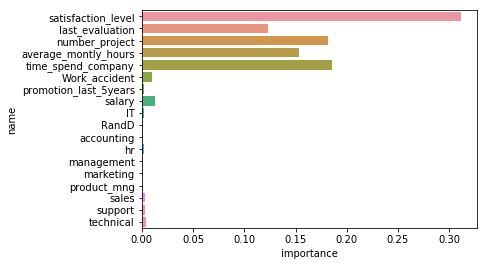

In [156]:
importances_df = pd.DataFrame(importances)
importances_df.columns=['importance']
columns_df = pd.DataFrame(df.drop('left', 1).columns.tolist())
columns_df.columns=['name']
importances_df = importances_df.join(columns_df)
sns.barplot(x='importance', y='name', data=importances_df)

In [167]:
n_emp = len(df)
print(df.left.value_counts())
print(df.left.value_counts()/n_emp*100)

0    11428
1     3571
Name: left, dtype: int64
0    76.191746
1    23.808254
Name: left, dtype: float64
